In [59]:
# Clustering Last-Mile Delivery Partners

# 📦 Step 1: Load Partner Data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load partner data
df_partners = pd.read_csv("../data/delivery_partners.csv")
df_partners.head()


,partner_id,daily_capacity,on_time_percent,cost_per_package
0,Partner_01,2929,89.10,1.15
1,Partner_02,2724,96.75,1.07
2,Partner_03,2754,98.65,0.65
3,Partner_04,1000,90.22,0.70
4,Partner_05,1703,93.91,1.09


In [60]:
# 🧼 Step 2: Preprocessing and Feature Scaling

features = ['daily_capacity', 'on_time_percent', 'cost_per_package']
X = df_partners[features]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


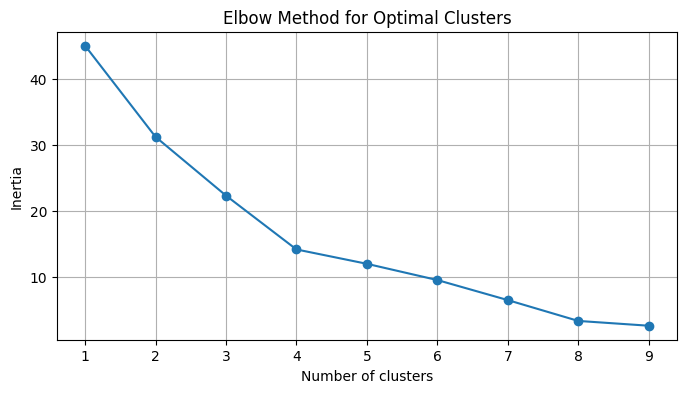

In [61]:
# 🔍 Step 3: Determine Optimal Number of Clusters (Elbow Method)

inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [62]:
# 🤖 Step 4: Apply KMeans Clustering (e.g., 3 clusters)

kmeans = KMeans(n_clusters=3, random_state=42)
df_partners['cluster'] = kmeans.fit_predict(X_scaled)

# Rename clusters as tiers based on performance (Tier 1 = best)
# Optional: Customize rules, here assuming lower cost and higher on-time is better

# Sort clusters based on avg performance score
cluster_perf = df_partners.groupby('cluster').agg({
    'on_time_percent': 'mean',
    'cost_per_package': 'mean'
}).reset_index()

cluster_perf['score'] = cluster_perf['on_time_percent'] - cluster_perf['cost_per_package']
cluster_perf.sort_values(by='score', ascending=False, inplace=True)
cluster_perf['tier'] = ['Tier 1', 'Tier 2', 'Tier 3'][:len(cluster_perf)]

# Map cluster to tier
tier_map = dict(zip(cluster_perf['cluster'], cluster_perf['tier']))
df_partners['tier'] = df_partners['cluster'].map(tier_map)
df_partners.drop(columns='cluster', inplace=True)

# View result
df_partners.sort_values('tier').head()


,partner_id,daily_capacity,on_time_percent,cost_per_package,tier
0,Partner_01,2929,89.10,1.15,Tier 1
1,Partner_02,2724,96.75,1.07,Tier 1
2,Partner_03,2754,98.65,0.65,Tier 1
4,Partner_05,1703,93.91,1.09,Tier 1
7,Partner_08,1561,98.95,0.78,Tier 1


In [63]:
# 💾 Step 5: Save Clustered Partners for Use in Allocation

df_partners.to_csv("../outputs/clustered_partners_for_allocation.csv", index=False)
print("✅ Clustered partner data saved to ../outputs/clustered_partners_for_allocation.csv")


✅ Clustered partner data saved to ../outputs/clustered_partners_for_allocation.csv


In [64]:
df_partners.sort_values('tier')

,partner_id,daily_capacity,on_time_percent,cost_per_package,tier
0,Partner_01,2929,89.10,1.15,Tier 1
1,Partner_02,2724,96.75,1.07,Tier 1
2,Partner_03,2754,98.65,0.65,Tier 1
4,Partner_05,1703,93.91,1.09,Tier 1
7,Partner_08,1561,98.95,0.78,Tier 1
12,Partner_13,2816,92.68,0.87,Tier 1
3,Partner_04,1000,90.22,0.70,Tier 2
5,Partner_06,682,92.45,0.60,Tier 2
10,Partner_11,785,97.43,0.94,Tier 2
6,Partner_07,1728,88.87,1.69,Tier 3
